## 라이브러리

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm


## 데이터 로드

In [3]:
data = pd.read_csv('./result.csv')
data

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,...,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing,Life expectancy
0,2015,0.831225,0.261880,-1.138088,-0.358384,-0.101739,-0.987357,0.250083,-3.400606,0.942863,...,-0.317913,-0.490445,0.359679,2.729099,2.685552,-0.750781,-0.627591,-0.450545,0.450545,65.0
1,2014,0.896482,0.278185,-1.138088,-0.357303,-0.163251,-1.012464,0.268074,-1.106887,0.951267,...,-0.317913,-0.488408,-0.221725,2.795474,2.728889,-0.765329,-0.658569,-0.450545,0.450545,59.9
2,2013,0.872011,0.294490,-1.138088,-0.357450,-0.169012,-1.037571,0.286064,-0.930447,0.930256,...,-0.317913,-0.487043,0.324790,2.839724,2.772227,-0.794425,-0.689547,-0.450545,0.450545,59.9
3,2012,0.904639,0.318948,-1.138088,-0.355058,0.049996,-1.062678,0.310052,-0.709897,1.094147,...,-0.317913,-0.484305,-0.163089,2.883973,2.837233,-0.828370,-0.720525,-0.450545,0.450545,59.5
4,2011,0.929110,0.335253,-1.138088,-0.389302,0.070995,-1.082763,0.334040,-0.665787,0.820995,...,-0.317913,-0.527749,-0.175590,2.950348,2.880570,-0.872014,-0.813460,-0.450545,0.450545,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650,2004,4.583464,-0.023460,-0.040434,-0.392721,-0.206086,-0.585649,0.004210,-0.709897,0.510023,...,6.028106,-0.499750,-0.005063,1.003360,0.973722,-1.099932,-0.906394,-0.450545,0.450545,44.3
2651,2003,4.518208,-0.031612,-0.116134,-0.392721,-0.116235,-0.605734,-0.001787,-3.356496,0.253680,...,6.615350,-0.499823,-0.007562,1.091860,1.082065,-1.046589,-0.813460,-0.450545,0.450545,44.5
2652,2002,-0.718612,-0.039765,-0.022770,-0.392721,-0.180720,-0.625820,-0.007784,-0.445237,0.257883,...,7.202593,-0.528192,-0.225241,-0.810878,-0.781445,-1.002945,-0.658569,-0.450545,0.450545,44.8
2653,2001,4.281654,-0.039765,-0.706596,-0.392721,-0.159813,-0.645905,-0.013780,-0.312907,0.102396,...,7.638290,-0.493000,-0.012221,-0.722379,-0.694771,-1.002945,-0.720525,-0.450545,0.450545,45.3


## 변수선택

In [4]:
df = data[['Schooling', 'HIV/AIDS', 'Adult Mortality', 'Life expectancy']]
df

,Schooling,HIV/AIDS,Adult Mortality,Life expectancy
0,-0.627591,-0.317913,0.831225,65.0
1,-0.658569,-0.317913,0.896482,59.9
2,-0.689547,-0.317913,0.872011,59.9
3,-0.720525,-0.317913,0.904639,59.5
4,-0.813460,-0.317913,0.929110,59.2
...,...,...,...,...
2650,-0.906394,6.028106,4.583464,44.3
2651,-0.813460,6.615350,4.518208,44.5
2652,-0.658569,7.202593,-0.718612,44.8
2653,-0.720525,7.638290,4.281654,45.3


## Best Hyperparameters: {'C': 0.1, 'coef0': 4, 'degree': 4} 에 맞춰 모델링 진행

In [ ]:
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

# 데이터를 학습용, 교차 검증용, 테스트용으로 나누기
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train_cv = scaler.fit_transform(X_train_cv)
X_test = scaler.transform(X_test)

# SVR 모델 생성 (다항식 커널 사용)
svr_model_poly = SVR(kernel='poly', 'coef0': 4, 'degree': 4)

# 교차 검증 수행
kf = KFold(n_splits=8, shuffle=True, random_state=42)  # 8-fold 교차 검증
cv_scores = cross_val_score(svr_model_poly, X_train_cv, y_train_cv, cv=kf, scoring='neg_mean_squared_error')

# 교차 검증 평균 MSE 출력
avg_cv_mse = -cv_scores.mean()
print(f'Average Cross-Validation MSE: {avg_cv_mse}')

# 테스트 데이터로 예측
svr_model_poly.fit(X_train_cv, y_train_cv)
y_pred_test = svr_model_poly.predict(X_test)

In [8]:
# MSE
mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error: {mse:.3f}')

# MAE
mae = mean_absolute_error(y_test, y_pred_test)
print(f'Mean Absolute Error: {mae:.3f}')

# r2
r2 = r2_score(y_test, y_pred_test)
print(f'R-squared: {r2:.3f}')

# Adjusted R-squared
# 독립 변수의 수
num_features = X_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - num_features - 1)
print(f'Adjusted R-squared: {adjusted_r2:.3f}')

Mean Squared Error: 10.53
Mean Absolute Error: 2.21
R-squared: 0.89
Adjusted R-squared: 0.88


## 예측 결과 시각화

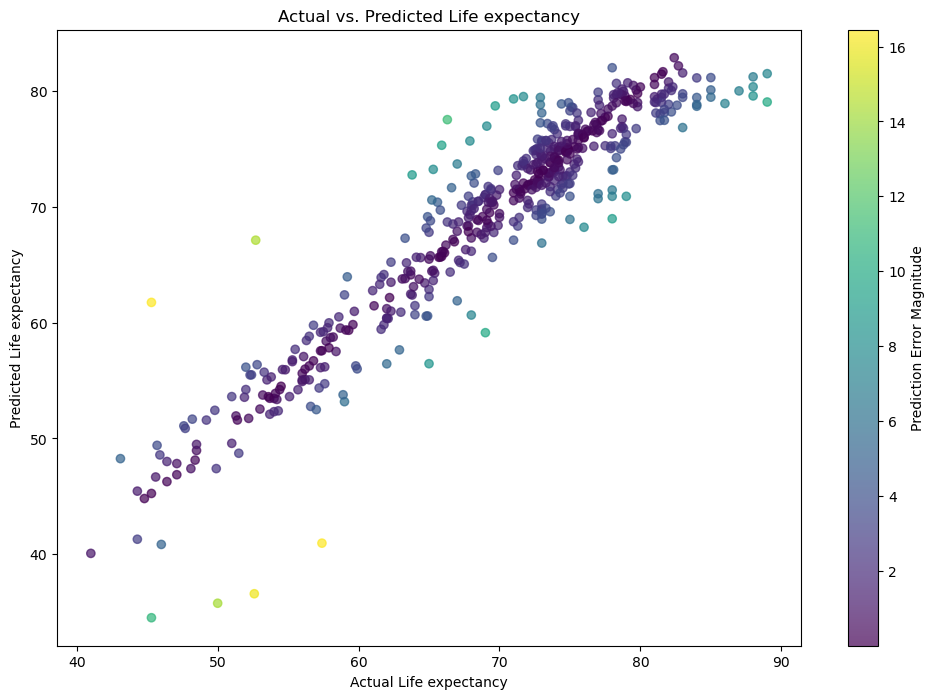

In [11]:
# 예측 오차의 크기에 따라 색상 할당
error = y_test - y_pred_test

colors = np.abs(error)

# 산점도 시각화
plt.figure(figsize=(12, 8))  # 그림의 크기 조절
plt.scatter(y_test, y_pred_test, c=colors, cmap='viridis', alpha=0.7)
plt.colorbar(label='Prediction Error Magnitude')
plt.xlabel("Actual Life expectancy")
plt.ylabel("Predicted Life expectancy")
plt.title("Actual vs. Predicted Life expectancy")
plt.show()

## 잔차의 정규성, 등분산성, 독립성 가정 확인

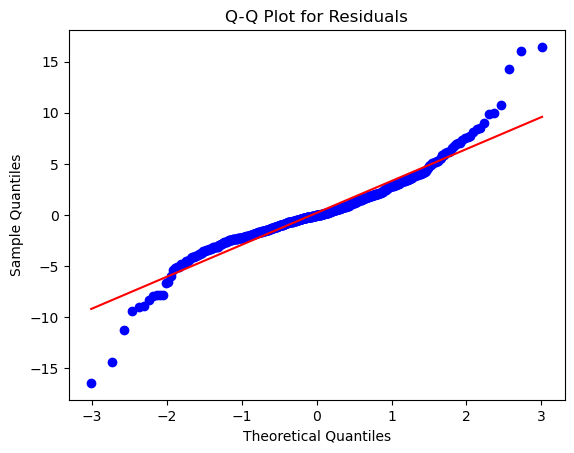

In [13]:
from scipy import stats

# Q-Q plot////
residuals = y_test - y_pred_test

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

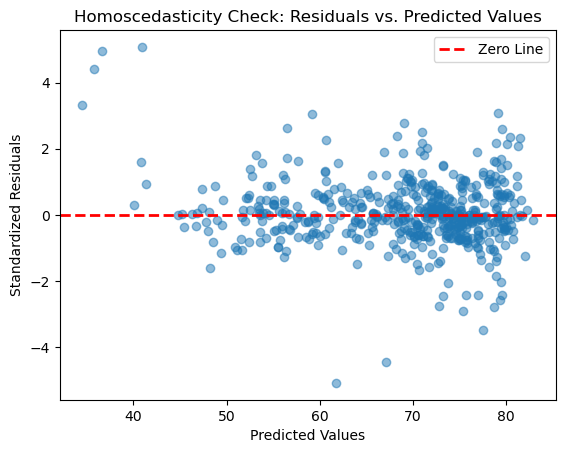

In [14]:
# 잔차의 등분산성
# 표준화된 잔차 계산
residuals = y_test - y_pred_test
std_residuals = residuals / np.std(residuals)

# 산점도 그래프 그리기
plt.scatter(y_pred_test, std_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Line')

# 그래프에 레이블 및 제목 추가
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Homoscedasticity Check: Residuals vs. Predicted Values')
plt.legend()
plt.show()

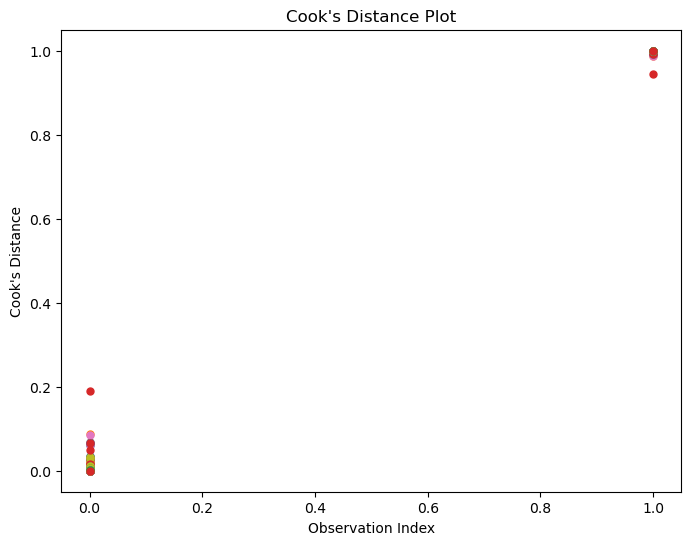

In [18]:
# 독립 변수 행렬에 상수 항 추가
X_train_const = sm.add_constant(X_train)

# 선형 회귀 모델 적합
model = sm.OLS(y_train, X_train_const)
results = model.fit()

# 모델을 사용하여 값 예측
y_pred = results.predict(X_train_const)

# 잔차 계산
residuals = y_train - y_pred

# Cook's distance 계산
influence = OLSInfluence(results)
cooks_distance = influence.cooks_distance

plt.figure(figsize=(8, 6))
plt.plot(cooks_distance, 'o', markersize=5)
plt.title("Cook's Distance Plot")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()